In [21]:
#  importações para tratamentos de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# Imports para ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
df = pd.read_csv('infopreco.csv', sep=';', encoding='latin1')

In [24]:
df.head()

,CNPJ,NOME,ENDEREÇO,COMPLEMENTO,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,DATA CADASTRO
0,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,"4,436",28/06/2018 17:49
1,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Etanol,"3,482",28/06/2018 17:49
2,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S500,"3,644",28/06/2018 17:49
3,62780000102,AUTO POSTO PARATI,"AVENIDA FILINTO MULLER,645",NaN,CENTRO,TRES LAGOAS,MS,Diesel S10,"3,734",28/06/2018 17:49
4,300357000195,POSTO E TRANSPORTADORA PEGORARO,"RODOVIA BR 163,S/N",KM 786,ZONA RURAL,COXIM,MS,Gasolina C Comum,"4,59",05/07/2018 18:55


In [68]:
# visualizando os tipos de classes que temos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
CNPJ             599 non-null int64
NOME             599 non-null object
ENDEREÇO         599 non-null object
COMPLEMENTO      177 non-null object
BAIRRO           595 non-null object
MUNICÍPIO        599 non-null object
UF               599 non-null object
PRODUTO          599 non-null object
VALOR VENDA      599 non-null float64
DATA CADASTRO    599 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 46.9+ KB


In [55]:
# convetendo o 'VALOR VENDA'
df['VALOR VENDA'] = df['VALOR VENDA'].apply(lambda x : str(x).replace(',','.')).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
CNPJ             599 non-null int64
NOME             599 non-null object
ENDEREÇO         599 non-null object
COMPLEMENTO      177 non-null object
BAIRRO           595 non-null object
MUNICÍPIO        599 non-null object
UF               599 non-null object
PRODUTO          599 non-null object
VALOR VENDA      599 non-null float64
DATA CADASTRO    599 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 46.9+ KB


In [6]:
# plot de calor adaptado para verificar dados faltantes
def grafico_dados_faltantes(_df):
    plt.figure(figsize=(15,5))
    return sns.heatmap(_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

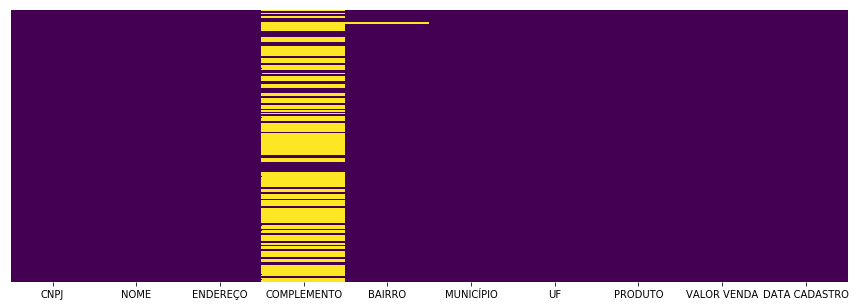

In [7]:
# gerar gráfico para verificar dados faltantes
grafico_dados_faltantes(df);

#### Como podemos observar no gráfico acima, a coluna COMPLEMENTO está com  muitos dados faltantes acredito que não seja uma coluna relevante para nós. Vamos exclui-la.

In [8]:
df.drop(['COMPLEMENTO'], axis=1, inplace=True)
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'BAIRRO', 'MUNICÍPIO', 'UF', 'PRODUTO',
       'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

#### Agora vamos dar uma olhada na coluna BAIRRO os valores que estiverem Nan e vamos preencher com "Bairro não cadastrado"

In [9]:
df['BAIRRO'].fillna(('Bairro não cadastrado'), inplace=True)

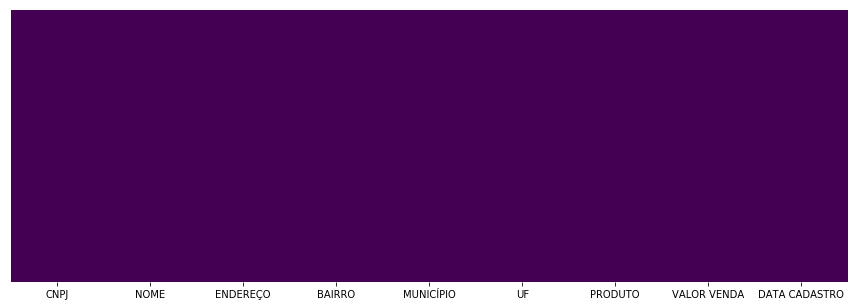

In [10]:
grafico_dados_faltantes(df);

#### Agora que o conjunto de dados original está tudo ok, vamos partir para predição 
#### Temos muitas variaveis descritivas vamos ter que testar algumas variaveis e converter em dummy

In [90]:
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'COMPLEMENTO', 'BAIRRO', 'MUNICÍPIO', 'UF',
       'PRODUTO', 'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

In [112]:
df['MUNICÍPIO'].unique()

array(['TRES LAGOAS', 'COXIM', 'SAO LUIS', "MACHADINHO D'OESTE",
       'CAMPO GRANDE', 'BRASILIA', 'CAMPINAS', 'CRISTALINA',
       'PIRES DO RIO', 'SAO JOSE DOS PINHAIS', 'CATAGUASES', 'TERESINA',
       'PINHEIRO MACHADO', 'RIBAS DO RIO PARDO', 'BELO JARDIM', 'ARACUAI',
       'VIAMAO', 'ITAJAI', 'FIGUEIROPOLIS', 'FORMOSA', 'PORANGATU',
       'LEME', 'ANDRADAS', 'GUARAI', 'ALTO ALEGRE DOS PARECIS', 'CHAPECO',
       'SERTANOPOLIS', 'SANTO ANTONIO DE PADUA', 'JARU',
       'SAO MIGUEL DO GUAPORE', 'NOVA ANDRADINA', 'DUQUE DE CAXIAS',
       'ITABORAI', 'CACERES', 'BELEM', 'BURITIS', 'RIO DE JANEIRO',
       'POUSO ALEGRE', 'CORUMBA', 'MUNDO NOVO', 'PORTO VELHO', 'MACAE',
       'PALMAS', 'TUCURUI', 'BOM PRINCIPIO', 'VILA BOA', 'GUARATINGUETA',
       'TRAIRAO', 'BALSA NOVA', 'QUEIMADOS', 'MIRANDA', 'CURITIBA',
       'CASCAVEL', 'PONTALINA', 'ARIQUEMES', 'ROLIM DE MOURA', 'MINEIROS',
       'MACAIBA', 'CACHOEIRINHA', 'ARAGUAINA', 'OURO PRETO DO OESTE',
       'CICERO DANTAS', 'ITAPO

In [30]:
campos = ['PRODUTO']
df.groupby(campos)[campos].count()

,PRODUTO
PRODUTO,
Diesel S10,159
Diesel S500,121
Etanol,131
GNV,13
Gasolina C Comum,175


In [31]:
df.columns

Index(['CNPJ', 'NOME', 'ENDEREÇO', 'COMPLEMENTO', 'BAIRRO', 'MUNICÍPIO', 'UF',
       'PRODUTO', 'VALOR VENDA', 'DATA CADASTRO'],
      dtype='object')

In [113]:
# depois de realizar alguns testes, percebi que o rmse sobe muito com outras variáves
# selecionei somente estás 3 variáveis 
df2 = df[['UF','PRODUTO', 'VALOR VENDA']]
df2.head()

,UF,PRODUTO,VALOR VENDA
0,MS,Gasolina C Comum,4.436
1,MS,Etanol,3.482
2,MS,Diesel S500,3.644
3,MS,Diesel S10,3.734
4,MS,Gasolina C Comum,4.590


In [114]:
df_dummy=pd.get_dummies(df2,columns=['UF','PRODUTO'], drop_first=True)
df_dummy.head()

,VALOR VENDA,UF_CE,UF_DF,UF_GO,UF_MA,UF_MG,UF_MS,UF_MT,UF_PA,UF_PB,...,UF_RO,UF_RS,UF_SC,UF_SE,UF_SP,UF_TO,PRODUTO_Diesel S500,PRODUTO_Etanol,PRODUTO_GNV,PRODUTO_Gasolina C Comum
0,4.436,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.482,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.644,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.734,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.590,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:

x = df_dummy.drop('VALOR VENDA', axis=1)
y = df_dummy['VALOR VENDA']

In [116]:
x_train, x_test, y_train, y_teste = train_test_split(x,y, test_size=0.33)

In [117]:
lm = LinearRegression()

In [118]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
lm.intercept_

3.986192767070431

In [120]:
coeff = pd.DataFrame(lm.coef_,x.columns, columns=['Coeficiente'])
coeff

,Coeficiente
UF_CE,-0.099655
UF_DF,-0.279007
UF_GO,-0.209753
UF_MA,-0.379716
UF_MG,-0.132842
UF_MS,-0.380764
UF_MT,-0.068919
UF_PA,-0.040796
UF_PB,-0.187193
UF_PE,-0.193058


In [121]:
predicao = lm.predict(x_test)

In [126]:
# O RMSE com estas colunas foi baixo
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste,predicao)))

RMSE: 0.40670804982252784


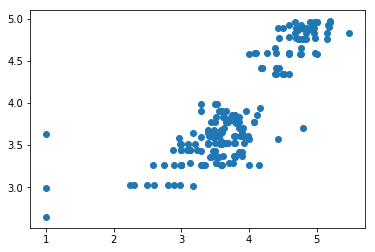

In [142]:
plt.scatter(y_teste, predicao);

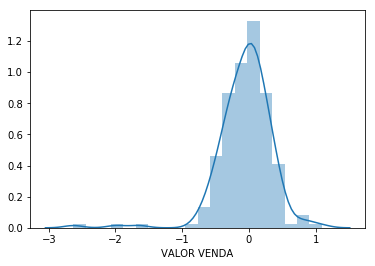

In [124]:
residuos = y_teste - predicao
sns.distplot(residuos, bins=20);

In [127]:
residuos

80    -0.017286
596    0.890926
413   -0.276439
408   -0.530686
378    0.384571
177   -0.457884
242    1.091814
449    0.214604
322    0.034968
277    0.151467
548    0.052649
248    0.210372
526    0.252978
368   -0.064351
587   -0.575921
389    0.645802
122   -0.036884
240   -1.989692
313    0.033116
538    0.161382
283    0.193079
342   -0.245037
284    0.070737
487   -0.074982
250   -0.196884
12    -0.086884
476   -0.337540
401   -0.119263
531    0.049996
52    -0.334982
         ...   
397   -0.730686
345   -0.070628
15    -0.270429
176   -0.046429
496    0.022561
344   -0.310439
203    0.291571
73     0.475996
170    0.321571
134    0.235131
421   -0.230686
478   -0.015879
236   -0.309226
288   -0.096074
188    0.160021
407    0.051467
109    0.063021
253   -0.275460
336    0.041714
471   -0.319439
437   -0.387884
64     0.423079
470    0.392714
285   -0.180847
229    0.040462
58     0.293460
532    0.003724
232   -0.440439
221    0.174571
388    0.260571
Name: VALOR VENDA, Lengt